In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet152, ResNet101

In [4]:
import splitfolders # or import splitfolders
input_folder = "Messidor"
output = "Messidor/output" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .3)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 1800 files [00:01, 959.12 files/s] 


In [4]:
train_path = "Messidor/output/train"
test_path = "Messidor/output/val"

In [5]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [128,128]

In [6]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(128,128),
                                              batch_size=2,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(128,128),
                                            batch_size=2,
                                            class_mode='categorical')

Found 1255 images belonging to 5 classes.
Found 545 images belonging to 5 classes.


In [8]:
from keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model

learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_accuracy", patience=3, verbose=1, factor=0.3, min_lr=0.0000001
)
early_stop = EarlyStopping(
    patience=10,
    verbose=1,
    monitor="val_accuracy",
    mode="max",
    min_delta=0.001,
    restore_best_weights=True,
)

In [9]:
from functools import reduce
 
def Average(lst): 
    return reduce(lambda a, b: a + b, lst) / len(lst) 

In [10]:
from sklearn.metrics import confusion_matrix, det_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,cohen_kappa_score

In [11]:
from imblearn.metrics import specificity_score, sensitivity_score

In [131]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
fpr = []
fnr = []
spec = []
sens = []
kapa = []
roc = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g,h,i,j):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    fpr.append(round(e, 3))
    fnr.append(round(f, 3))
    spec.append(round(g, 3))
    sens.append(round(h, 3))
    kapa.append(round(i, 3))
    roc.append(round(j, 3))

# ResNet50

In [12]:
res101=ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
x1= Flatten()(res101.output)
prediction1 = Dense(5, activation='softmax')(x1)
model1 = Model(inputs = res101.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [14]:
hist1 = model1.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
628/628 [==============================] - 24s 33ms/step - loss: 2.9300 - accuracy: 0.2940 - val_loss: 2.5730 - val_accuracy: 0.2000
Epoch 2/30
628/628 [==============================] - 21s 33ms/step - loss: 1.3153 - accuracy: 0.3817 - val_loss: 2.0174 - val_accuracy: 0.3505
Epoch 3/30
628/628 [==============================] - 21s 33ms/step - loss: 1.5574 - accuracy: 0.3769 - val_loss: 34.9887 - val_accuracy: 0.2624
Epoch 4/30
628/628 [==============================] - 21s 33ms/step - loss: 1.8233 - accuracy: 0.3299 - val_loss: 1.3620 - val_accuracy: 0.3706
Epoch 5/30
628/628 [==============================] - 21s 33ms/step - loss: 1.5734 - accuracy: 0.3594 - val_loss: 20.7521 - val_accuracy: 0.2716
Epoch 6/30
628/628 [==============================] - 20s 33ms/step - loss: 1.6657 - accuracy: 0.3466 - val_loss: 1.2239 - val_accuracy: 0.4000
Epoch 7/30
628/628 [==============================] - 20s 33ms/step - loss: 1.2234 - accuracy: 0.4008 - val_loss: 1.8204 - val_accurac

In [15]:
y_pred = model1.predict(test_set,verbose=1,steps=len(test_set))

273/273 [==============================] - 2s 6ms/step


In [16]:
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

[[33 11 26 15 24]
 [26 11 36 11 25]
 [31  9 21 19 29]
 [32  8 30 18 21]
 [29 14 35 11 20]]


In [17]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [18]:
dl1_acc = hist1.history["val_accuracy"]
dl1_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl1_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl1_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl1_fpr = 2*Average(fpr)
dl1_fnr = 2*Average(fnr)
dl1_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl1_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl1_kap = cohen_kappa_score(test_set.classes,y_pred)
dl1_roc = metrics.auc(fpr, fnr)

In [132]:
storeResults('ResNet50',dl1_acc[27],dl1_prec,dl1_rec,dl1_f1,dl1_fpr,dl1_fnr,dl1_spec,dl1_sens,dl1_kap,dl1_roc)

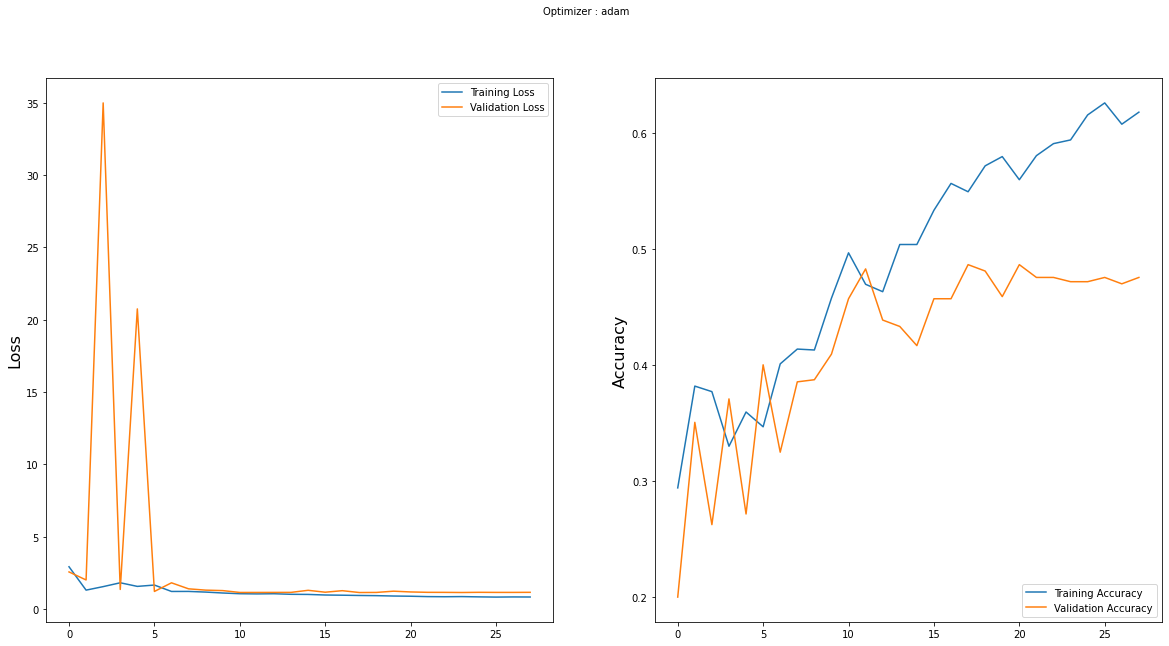

In [19]:
import matplotlib.pyplot as plt

x=hist1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet152

In [22]:
res101=ResNet152(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(res101.output)
prediction1 = Dense(5, activation='softmax')(x1)
model2 = Model(inputs = res101.inputs, outputs = prediction1)
model2.summary()
model2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [23]:
hist2 = model2.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
628/628 [==============================] - 65s 97ms/step - loss: 2.8481 - accuracy: 0.2040 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/30
628/628 [==============================] - 59s 94ms/step - loss: 1.8104 - accuracy: 0.1952 - val_loss: 27.2886 - val_accuracy: 0.2000
Epoch 3/30
628/628 [==============================] - 59s 95ms/step - loss: 1.7148 - accuracy: 0.2127 - val_loss: 1.8508 - val_accuracy: 0.2073
Epoch 4/30
628/628 [==============================] - 59s 94ms/step - loss: 2.3045 - accuracy: 0.2135 - val_loss: 2.5966 - val_accuracy: 0.1963
Epoch 5/30
628/628 [==============================] - 59s 94ms/step - loss: 1.8739 - accuracy: 0.1825 - val_loss: 1.6401 - val_accuracy: 0.2000
Epoch 6/30
628/628 [==============================] - 59s 94ms/step - loss: 1.6610 - accuracy: 0.2215 - val_loss: 17.1735 - val_accuracy: 0.1450

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/30
628/628 [==============================] -

In [24]:
y_pred = model2.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

273/273 [==============================] - 6s 18ms/step
[[ 1 74  2  0 32]
 [ 0 62  4  1 42]
 [ 0 66  3  1 39]
 [ 1 56  4  1 47]
 [ 3 71  3  0 32]]


In [25]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [26]:
dl2_acc = hist2.history["val_accuracy"]
dl2_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl2_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl2_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl2_fpr = 2*Average(fpr)
dl2_fnr = 2*Average(fnr)
dl2_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl2_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl2_kap = cohen_kappa_score(test_set.classes,y_pred)
dl2_roc = metrics.auc(fpr, fnr)

In [133]:
storeResults('ResNet152',dl2_acc[29],dl2_prec,dl2_rec,dl2_f1,dl2_fpr,dl2_fnr,dl2_spec,dl2_sens,dl2_kap,dl2_roc)

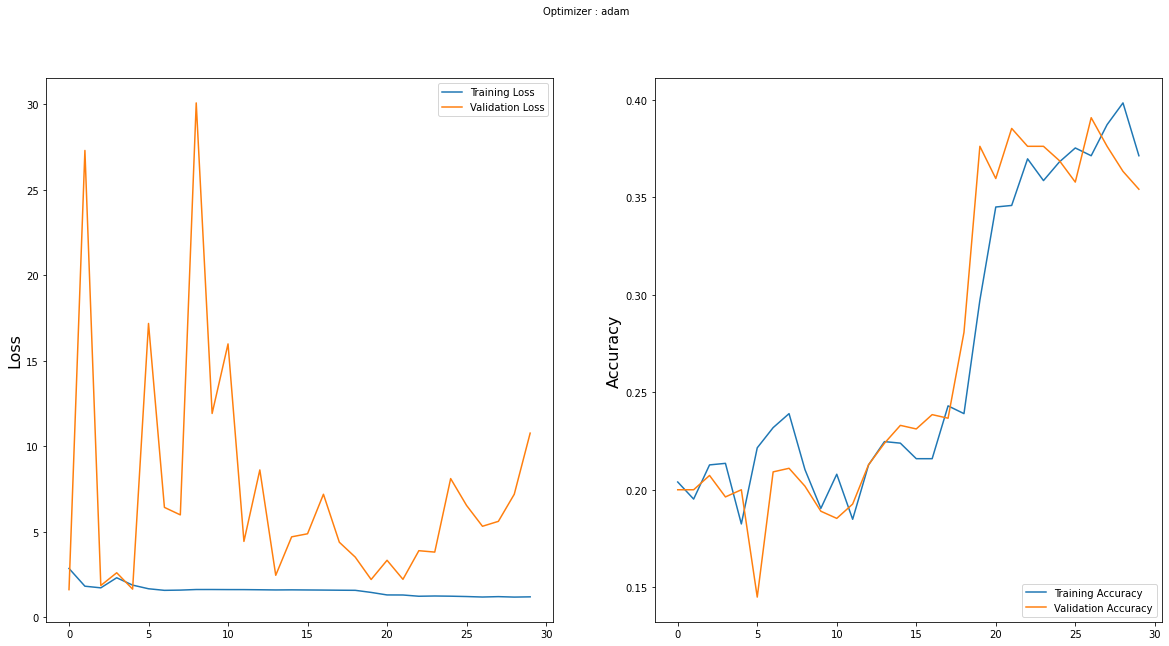

In [27]:
import matplotlib.pyplot as plt

x=hist2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ResNet101

In [28]:
res101=ResNet101(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(res101.output)
prediction1 = Dense(5, activation='softmax')(x1)
model3 = Model(inputs = res101.inputs, outputs = prediction1)
model3.summary()
model3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [29]:
hist3 = model3.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
628/628 [==============================] - 44s 65ms/step - loss: 2.9388 - accuracy: 0.2406 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/30
628/628 [==============================] - 40s 64ms/step - loss: 1.9532 - accuracy: 0.2127 - val_loss: 2033.5665 - val_accuracy: 0.1725
Epoch 3/30
628/628 [==============================] - 40s 64ms/step - loss: 1.9076 - accuracy: 0.2080 - val_loss: 676.9767 - val_accuracy: 0.1670
Epoch 4/30
628/628 [==============================] - 40s 64ms/step - loss: 1.7093 - accuracy: 0.2327 - val_loss: 1707.1467 - val_accuracy: 0.2440
Epoch 5/30
628/628 [==============================] - 40s 64ms/step - loss: 1.6306 - accuracy: 0.2295 - val_loss: 323.0027 - val_accuracy: 0.2110
Epoch 6/30
628/628 [==============================] - 40s 64ms/step - loss: 1.6213 - accuracy: 0.2271 - val_loss: 1.9820 - val_accuracy: 0.2000
Epoch 7/30
628/628 [==============================] - 40s 64ms/step - loss: 1.6265 - accuracy: 0.2542 - val_loss: 14230.5557 -

In [30]:
y_pred = model3.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

273/273 [==============================] - 4s 12ms/step
[[31  3 43 13 19]
 [29  4 39 19 18]
 [30  5 46 11 17]
 [35  2 35 15 22]
 [30  4 46 14 15]]


In [31]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [32]:
dl3_acc = hist3.history["val_accuracy"]
dl3_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl3_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl3_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl3_fpr = 2*Average(fpr)
dl3_fnr = 2*Average(fnr)
dl3_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl3_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl3_kap = cohen_kappa_score(test_set.classes,y_pred)
dl3_roc = metrics.auc(fpr, fnr)

In [134]:
storeResults('ResNet101',dl3_acc[22],dl3_prec,dl3_rec,dl3_f1,dl3_fpr,dl3_fnr,dl3_spec,dl3_sens,dl3_kap,dl3_roc)

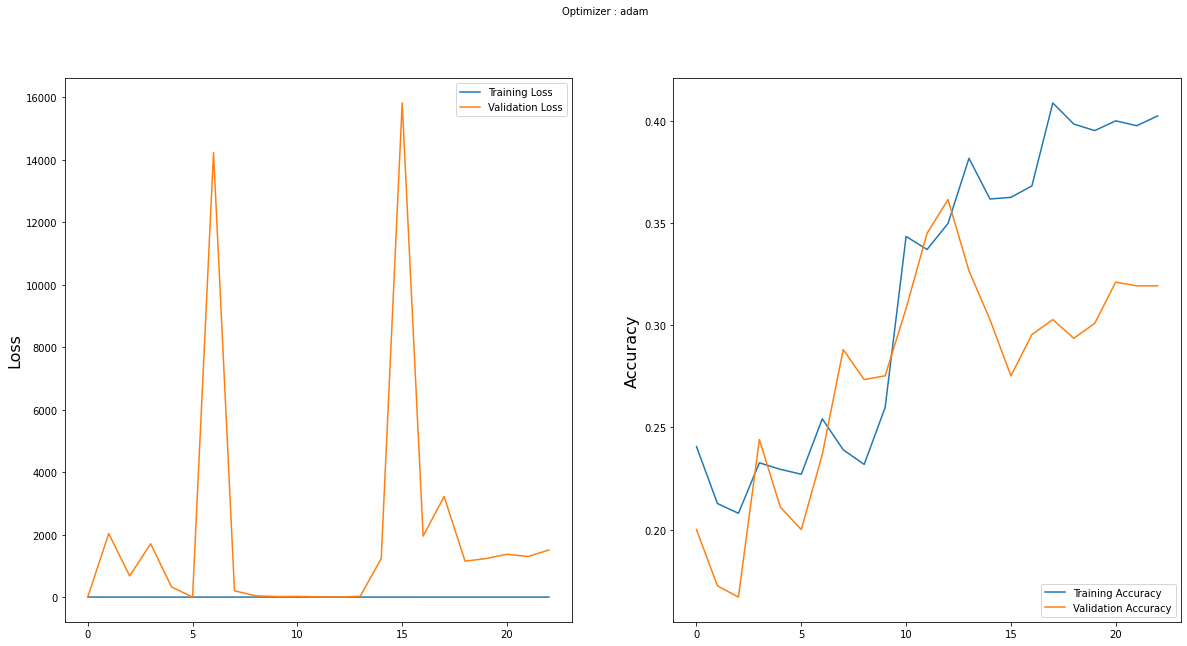

In [33]:
import matplotlib.pyplot as plt

x=hist3
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# CNN

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [35]:
model4 = Sequential()
model4.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(128, 128, 3)))
model4.add(MaxPool2D(strides=2))
model4.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model4.add(MaxPool2D(strides=2))
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dense(84, activation='relu'))
model4.add(Dense(5, activation='softmax'))

In [36]:
model4.summary()
model4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 48)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 43200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               11059456  
_________________________________________________________________
dense_4 (Dense)              (None, 84)                2

In [37]:
hist4 = model4.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
628/628 [==============================] - 4s 6ms/step - loss: 1.5633 - accuracy: 0.2390 - val_loss: 1.6160 - val_accuracy: 0.2165
Epoch 2/30
628/628 [==============================] - 4s 6ms/step - loss: 1.4831 - accuracy: 0.2837 - val_loss: 1.5957 - val_accuracy: 0.2312
Epoch 3/30
628/628 [==============================] - 4s 6ms/step - loss: 1.4296 - accuracy: 0.3147 - val_loss: 1.5875 - val_accuracy: 0.2495
Epoch 4/30
628/628 [==============================] - 4s 6ms/step - loss: 1.4004 - accuracy: 0.3307 - val_loss: 1.3101 - val_accuracy: 0.3560
Epoch 5/30
628/628 [==============================] - 4s 6ms/step - loss: 1.3378 - accuracy: 0.3458 - val_loss: 1.4399 - val_accuracy: 0.3156
Epoch 6/30
628/628 [==============================] - 4s 6ms/step - loss: 1.2521 - accuracy: 0.3896 - val_loss: 1.3750 - val_accuracy: 0.3670
Epoch 7/30
628/628 [==============================] - 4s 6ms/step - loss: 1.2097 - accuracy: 0.3984 - val_loss: 1.2370 - val_accuracy: 0.4000
Epoch 

In [38]:
y_pred = model4.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

273/273 [==============================] - 1s 2ms/step
[[29 16 26 18 20]
 [22 24 26 14 23]
 [27 15 34 14 19]
 [22 13 27 21 26]
 [23 17 32 20 17]]


In [39]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [40]:
dl4_acc = hist4.history["val_accuracy"]
dl4_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl4_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl4_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl4_fpr = 2*Average(fpr)
dl4_fnr = 2*Average(fnr)
dl4_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl4_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl4_kap = cohen_kappa_score(test_set.classes,y_pred)
dl4_roc = metrics.auc(fpr, fnr)

In [135]:
storeResults('CNN',dl4_acc[29],dl4_prec,dl4_rec,dl4_f1,dl4_fpr,dl4_fnr,dl4_spec,dl4_sens,dl4_kap,dl4_roc)

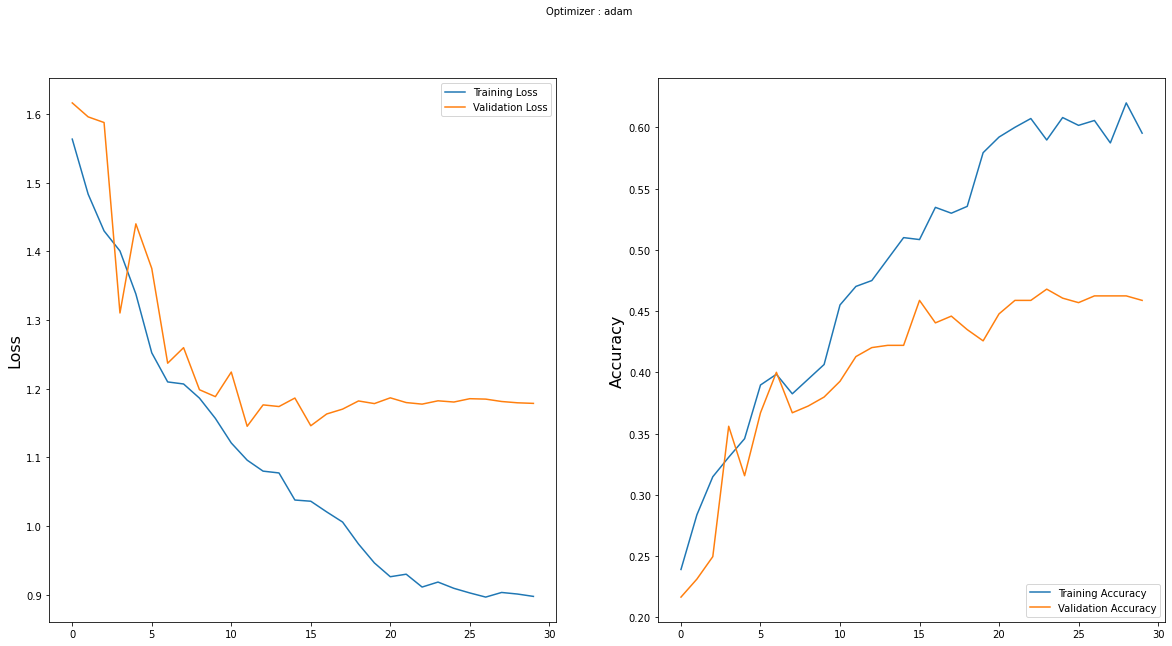

In [41]:
import matplotlib.pyplot as plt

x=hist4
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# AlexNet

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [43]:
np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(128,128,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(5))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 96)        34944     
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 32, 32, 96)        384       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 96)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 16, 16, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 256)      

In [44]:
AlexNet.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [45]:
hist5 = AlexNet.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
628/628 [==============================] - 9s 14ms/step - loss: 1.8200 - accuracy: 0.2263 - val_loss: 1.8615 - val_accuracy: 0.2440
Epoch 2/30
628/628 [==============================] - 8s 13ms/step - loss: 1.8147 - accuracy: 0.2231 - val_loss: 1.7192 - val_accuracy: 0.1982
Epoch 3/30
628/628 [==============================] - 8s 13ms/step - loss: 1.6968 - accuracy: 0.2279 - val_loss: 1.8284 - val_accuracy: 0.2037
Epoch 4/30
628/628 [==============================] - 8s 13ms/step - loss: 1.6133 - accuracy: 0.2271 - val_loss: 1.6135 - val_accuracy: 0.1945

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/30
628/628 [==============================] - 8s 13ms/step - loss: 1.6106 - accuracy: 0.2375 - val_loss: 1.5765 - val_accuracy: 0.3028
Epoch 6/30
628/628 [==============================] - 8s 13ms/step - loss: 1.6051 - accuracy: 0.2247 - val_loss: 1.5787 - val_accuracy: 0.3028
Epoch 7/30
628/628 [==============================] - 8s 13ms

In [46]:
y_pred = AlexNet.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

273/273 [==============================] - 1s 2ms/step
[[ 0  8 43 11 47]
 [ 1 14 39  9 46]
 [ 0  8 51  5 45]
 [ 1 14 48  4 42]
 [ 0 10 49  2 48]]


In [47]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [48]:
dl5_acc = hist5.history["val_accuracy"]
dl5_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl5_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl5_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl5_fpr = 2*Average(fpr)
dl5_fnr = 2*Average(fnr)
dl5_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl5_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl5_kap = cohen_kappa_score(test_set.classes,y_pred)
dl5_roc = metrics.auc(fpr, fnr)

In [136]:
storeResults('AlexNet',dl5_acc[19],dl5_prec,dl5_rec,dl5_f1,dl5_fpr,dl5_fnr,dl5_spec,dl5_sens,dl5_kap,dl5_roc)

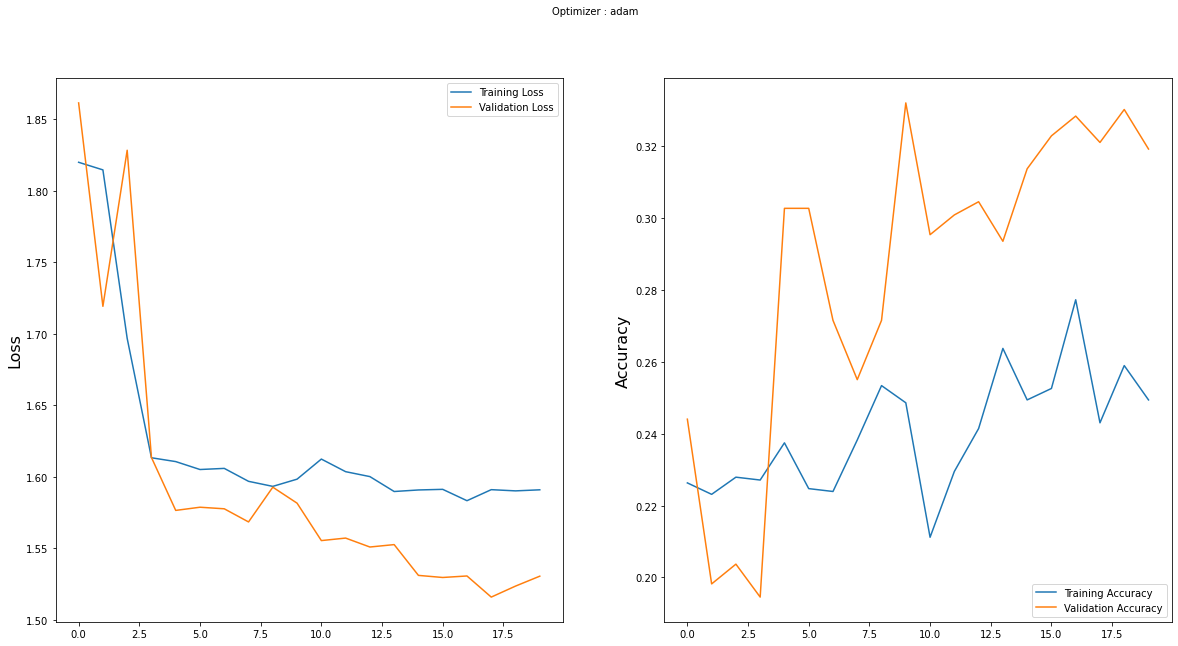

In [49]:
import matplotlib.pyplot as plt

x=hist5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# InceptionV3

In [50]:
# create the base pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)

predictions = Dense(5, activation='softmax')(x2)

# this is the model we will train
model6 = Model(inputs=base_model.input, outputs=predictions)
model6.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model6.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d_7[0][0]                   
__________________________________________________________________________________________________
activation_9 (Activation)       (None, None, None, 3 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [51]:
hist6 = model6.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
628/628 [==============================] - 28s 40ms/step - loss: 1.9830 - accuracy: 0.2390 - val_loss: 3.9210 - val_accuracy: 0.2294
Epoch 2/30
628/628 [==============================] - 25s 39ms/step - loss: 1.8536 - accuracy: 0.2096 - val_loss: 12.8122 - val_accuracy: 0.2018
Epoch 3/30
628/628 [==============================] - 25s 39ms/step - loss: 1.8472 - accuracy: 0.1920 - val_loss: 3.1259 - val_accuracy: 0.2734
Epoch 4/30
628/628 [==============================] - 25s 39ms/step - loss: 1.8033 - accuracy: 0.2367 - val_loss: 1.9962 - val_accuracy: 0.2404
Epoch 5/30
628/628 [==============================] - 25s 39ms/step - loss: 1.7852 - accuracy: 0.2088 - val_loss: 2.1119 - val_accuracy: 0.2257
Epoch 6/30
628/628 [==============================] - 25s 39ms/step - loss: 1.7673 - accuracy: 0.1920 - val_loss: 2.6287 - val_accuracy: 0.2202

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 7/30
628/628 [==============================] - 

In [52]:
y_pred = model6.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

273/273 [==============================] - 2s 7ms/step
[[ 0 35 55 19  0]
 [ 0 28 51 26  4]
 [ 0 39 43 24  3]
 [ 0 35 43 31  0]
 [ 0 29 55 23  2]]


In [53]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [54]:
dl6_acc = hist6.history["val_accuracy"]
dl6_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl6_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl6_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl6_fpr = 2*Average(fpr)
dl6_fnr = 2*Average(fnr)
dl6_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl6_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl6_kap = cohen_kappa_score(test_set.classes,y_pred)
dl6_roc = metrics.auc(fpr, fnr)

In [137]:
storeResults('InceptionV3',dl6_acc[12],dl6_prec,dl6_rec,dl6_f1,dl6_fpr,dl6_fnr,dl6_spec,dl6_sens,dl6_kap,dl6_roc)

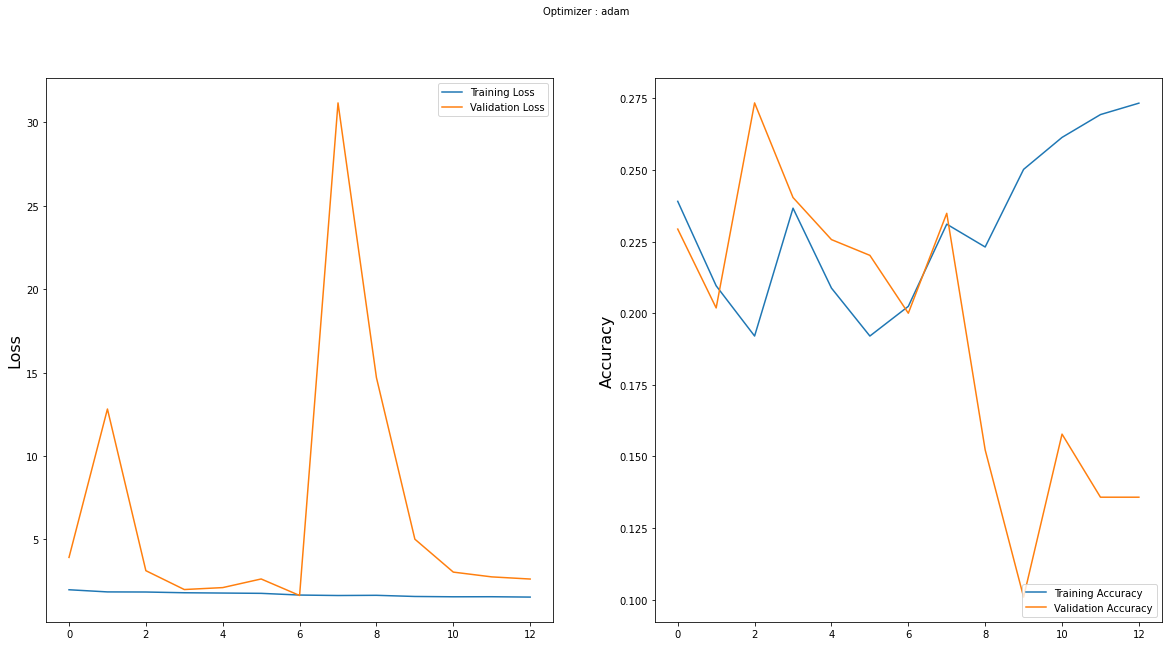

In [55]:
import matplotlib.pyplot as plt

x=hist6
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# InceptionResnet-V2

In [58]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

mob1 = InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(mob1.output)
prediction1 = Dense(5, activation='softmax')(x1)
model7 = Model(inputs = mob1.inputs, outputs = prediction1)
model7.summary()
model7.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_304 (Conv2D)             (None, 63, 63, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_297 (BatchN (None, 63, 63, 32)   96          conv2d_304[0][0]                 
__________________________________________________________________________________________________
activation_306 (Activation)     (None, 63, 63, 32)   0           batch_normalization_297[0][0]    
____________________________________________________________________________________________

In [59]:
hist7 = model7.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
628/628 [==============================] - 69s 101ms/step - loss: 2.4395 - accuracy: 0.2717 - val_loss: 11.2423 - val_accuracy: 0.2239
Epoch 2/30
628/628 [==============================] - 62s 99ms/step - loss: 1.9940 - accuracy: 0.3203 - val_loss: 37.6813 - val_accuracy: 0.3101
Epoch 3/30
628/628 [==============================] - 61s 97ms/step - loss: 2.0115 - accuracy: 0.3355 - val_loss: 27.3043 - val_accuracy: 0.2147
Epoch 4/30
628/628 [==============================] - 61s 97ms/step - loss: 1.8262 - accuracy: 0.3474 - val_loss: 8.1093 - val_accuracy: 0.2312
Epoch 5/30
628/628 [==============================] - 61s 97ms/step - loss: 1.7278 - accuracy: 0.3410 - val_loss: 1.4435 - val_accuracy: 0.3101

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/30
628/628 [==============================] - 61s 98ms/step - loss: 1.3259 - accuracy: 0.3562 - val_loss: 1.3496 - val_accuracy: 0.3505
Epoch 7/30
628/628 [==============================]

In [60]:
y_pred = model7.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

273/273 [==============================] - 6s 19ms/step
[[30  2 18 11 48]
 [41  2 16  8 42]
 [40  4 21 11 33]
 [38  5 14 11 41]
 [39  4 15  9 42]]


In [61]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [62]:
dl7_acc = hist7.history["val_accuracy"]
dl7_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl7_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl7_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl7_fpr = 2*Average(fpr)
dl7_fnr = 2*Average(fnr)
dl7_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl7_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl7_kap = cohen_kappa_score(test_set.classes,y_pred)
dl7_roc = metrics.auc(fpr, fnr)

In [138]:
storeResults('InceptionResNetV2',dl7_acc[21],dl7_prec,dl7_rec,dl7_f1,dl7_fpr,dl7_fnr,dl7_spec,dl7_sens,dl7_kap,dl7_roc)

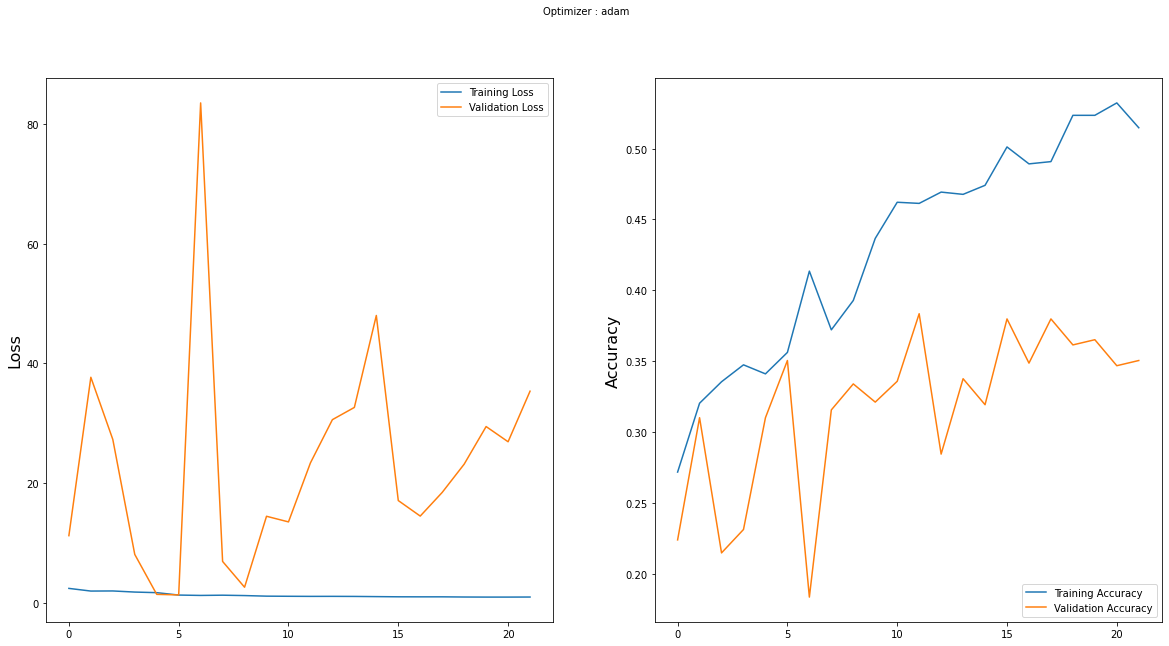

In [63]:
import matplotlib.pyplot as plt

x=hist7
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Deep Residual

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras import layers as Layers

In [65]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="same", kernel_initializer="he_normal",
                        use_bias=False)


In [66]:
class ResidualNet(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            tf.keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            tf.keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                tf.keras.layers.BatchNormalization()
            ]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [67]:
model8 = tf.keras.Sequential([
    DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[128, 128, 3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"),
])

In [68]:
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model8.add(ResidualNet(filters, strides=strides))
    prev_filters = filters

In [69]:
model8.add(tf.keras.layers.GlobalAvgPool2D())
model8.add(tf.keras.layers.Flatten())
model8.add(tf.keras.layers.Dense(5, activation="softmax"))

In [70]:
model8.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model8.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_507 (Conv2D)          (None, 64, 64, 64)        9408      
_________________________________________________________________
batch_normalization_500 (Bat (None, 64, 64, 64)        256       
_________________________________________________________________
activation_509 (Activation)  (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
residual_net (ResidualNet)   (None, 32, 32, 64)        74240     
_________________________________________________________________
residual_net_1 (ResidualNet) (None, 32, 32, 64)        74240     
_________________________________________________________________
residual_net_2 (ResidualNet) (None, 32, 32, 64)       

In [71]:
hist8 = model8.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
628/628 [==============================] - 13s 19ms/step - loss: 1.8608 - accuracy: 0.2837 - val_loss: 2.3072 - val_accuracy: 0.2661
Epoch 2/30
628/628 [==============================] - 11s 18ms/step - loss: 1.5693 - accuracy: 0.3410 - val_loss: 3.8090 - val_accuracy: 0.2000
Epoch 3/30
628/628 [==============================] - 11s 18ms/step - loss: 1.4564 - accuracy: 0.3713 - val_loss: 2.1598 - val_accuracy: 0.3303
Epoch 4/30
628/628 [==============================] - 11s 18ms/step - loss: 1.4116 - accuracy: 0.3570 - val_loss: 1.4500 - val_accuracy: 0.3541
Epoch 5/30
628/628 [==============================] - 11s 17ms/step - loss: 1.3749 - accuracy: 0.3976 - val_loss: 1.9041 - val_accuracy: 0.2569
Epoch 6/30
628/628 [==============================] - 11s 17ms/step - loss: 1.3622 - accuracy: 0.3649 - val_loss: 1.6770 - val_accuracy: 0.3413
Epoch 7/30
628/628 [==============================] - 11s 17ms/step - loss: 1.3413 - accuracy: 0.3912 - val_loss: 1.4923 - val_accuracy:

In [72]:
y_pred = model8.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

273/273 [==============================] - 1s 4ms/step
[[16 21 30 21 21]
 [19 15 30 23 22]
 [22 16 28 17 26]
 [26 10 32 24 17]
 [15 18 26 22 28]]


In [75]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [81]:
dl8_acc = hist8.history["val_accuracy"]
dl8_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl8_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl8_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl8_fpr = 2*Average(fpr)
dl8_fnr = 2*Average(fnr)
dl8_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl8_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl8_kap = cohen_kappa_score(test_set.classes,y_pred)
dl8_roc = metrics.auc(fpr, fnr)

In [139]:
storeResults('Deep Residual Networks',dl8_acc[29],dl8_prec,dl8_rec,dl8_f1,dl8_fpr,dl8_fnr,dl8_spec,dl8_sens,dl8_kap,dl8_roc)

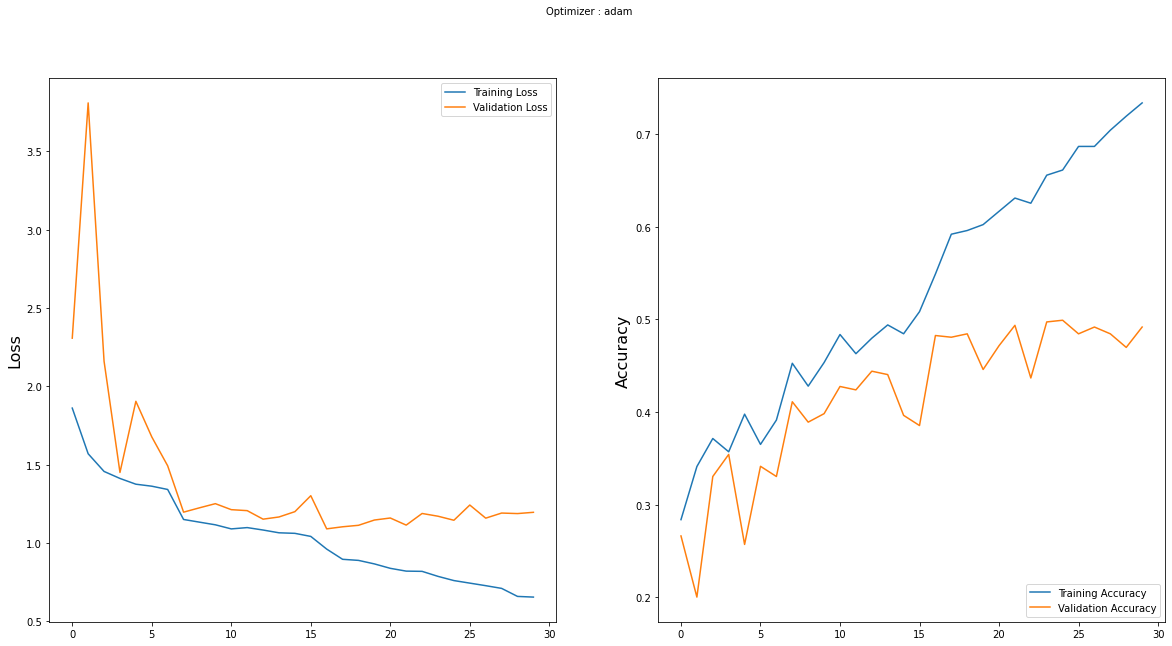

In [82]:
import matplotlib.pyplot as plt

x=hist8
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# DenseNet201

In [88]:
from tensorflow.keras.applications import DenseNet201, DenseNet121

In [91]:
des201=DenseNet201(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(des201.output)
prediction1 = Dense(5, activation='softmax')(x1)
model9 = Model(inputs = des201.inputs, outputs = prediction1)
model9.summary()
model9.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 134, 134, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [92]:
hist9 = model9.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
628/628 [==============================] - 75s 108ms/step - loss: 6.6320 - accuracy: 0.2303 - val_loss: 68818.6172 - val_accuracy: 0.1331
Epoch 2/30
628/628 [==============================] - 66s 105ms/step - loss: 3.9663 - accuracy: 0.2733 - val_loss: 17.8886 - val_accuracy: 0.2749
Epoch 3/30
628/628 [==============================] - 66s 105ms/step - loss: 2.0638 - accuracy: 0.3259 - val_loss: 2.7388 - val_accuracy: 0.3474
Epoch 4/30
628/628 [==============================] - 66s 105ms/step - loss: 1.5640 - accuracy: 0.3562 - val_loss: 1.3906 - val_accuracy: 0.3562
Epoch 5/30
628/628 [==============================] - 66s 105ms/step - loss: 1.3709 - accuracy: 0.3817 - val_loss: 9.4790 - val_accuracy: 0.2255
Epoch 6/30
628/628 [==============================] - 66s 105ms/step - loss: 1.3160 - accuracy: 0.3610 - val_loss: 186.7757 - val_accuracy: 0.2000
Epoch 7/30
628/628 [==============================] - 66s 105ms/step - loss: 1.2643 - accuracy: 0.3745 - val_loss: 3.0564 -

In [93]:
y_pred = model9.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

273/273 [==============================] - 5s 16ms/step
[[17 15 36 18 23]
 [13 17 39 20 20]
 [13  6 56 15 19]
 [21  7 39 21 21]
 [13 11 44 13 28]]


In [94]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [96]:
dl9_acc = hist9.history["val_accuracy"]
dl9_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl9_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl9_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl9_fpr = 2*Average(fpr)
dl9_fnr = 2*Average(fnr)
dl9_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl9_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl9_kap = cohen_kappa_score(test_set.classes,y_pred)
dl9_roc = metrics.auc(fpr, fnr)

In [140]:
storeResults('DenseNet201',dl9_acc[29],dl9_prec,dl9_rec,dl9_f1,dl9_fpr,dl9_fnr,dl9_spec,dl9_sens,dl9_kap,dl9_roc)

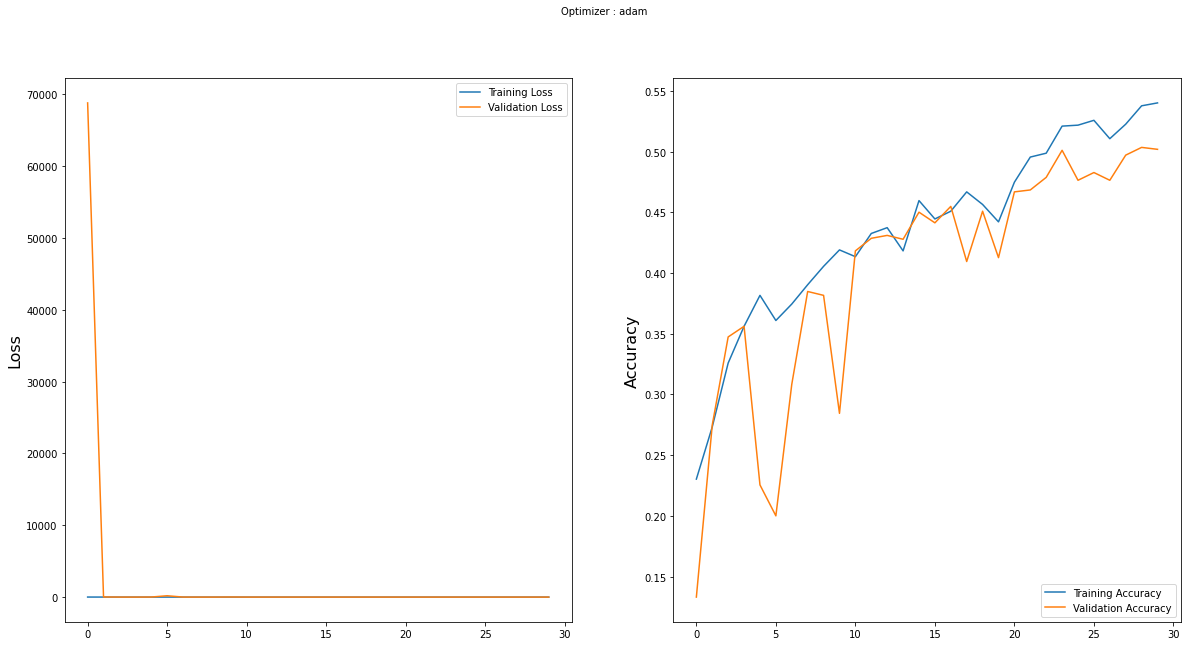

In [97]:
import matplotlib.pyplot as plt

x=hist9
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# DenseNet121

In [98]:
des201=DenseNet121(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x1= Flatten()(des201.output)
prediction1 = Dense(5, activation='softmax')(x1)
model10 = Model(inputs = des201.inputs, outputs = prediction1)
model10.summary()
model10.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_8 (ZeroPadding2D (None, 134, 134, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_8[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
___________________________________________________________________________________________

In [99]:
hist10 = model10.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set),callbacks=[learning_rate_reduction, early_stop])

Epoch 1/30
628/628 [==============================] - 47s 69ms/step - loss: 5.6811 - accuracy: 0.2335 - val_loss: 3.7271 - val_accuracy: 0.2916
Epoch 2/30
628/628 [==============================] - 41s 65ms/step - loss: 3.2927 - accuracy: 0.2876 - val_loss: 2.1385 - val_accuracy: 0.3633
Epoch 3/30
628/628 [==============================] - 41s 66ms/step - loss: 2.5704 - accuracy: 0.3108 - val_loss: 4.0384 - val_accuracy: 0.2574
Epoch 4/30
628/628 [==============================] - 41s 65ms/step - loss: 2.0901 - accuracy: 0.3458 - val_loss: 1.6317 - val_accuracy: 0.3418
Epoch 5/30
628/628 [==============================] - 41s 65ms/step - loss: 1.9005 - accuracy: 0.3625 - val_loss: 4.6875 - val_accuracy: 0.3267

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 6/30
628/628 [==============================] - 41s 65ms/step - loss: 1.3058 - accuracy: 0.3841 - val_loss: 1.4780 - val_accuracy: 0.3920
Epoch 7/30
628/628 [==============================] - 4

In [107]:
y_pred = model10.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

273/273 [==============================] - 3s 10ms/step
[[ 9 19 32 26 23]
 [11 23 30 28 17]
 [11 17 36 29 16]
 [ 5 14 41 35 14]
 [ 7 18 31 34 19]]


In [108]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [110]:
dl10_acc = hist10.history["val_accuracy"]
dl10_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl10_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl10_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl10_fpr = 2*Average(fpr)
dl10_fnr = 2*Average(fnr)
dl10_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl10_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl10_kap = cohen_kappa_score(test_set.classes,y_pred)
dl10_roc = metrics.auc(fpr, fnr)

In [141]:
storeResults('DenseNet121',dl10_acc[29],dl10_prec,dl10_rec,dl10_f1,dl10_fpr,dl10_fnr,dl10_spec,dl10_sens,dl10_kap,dl10_roc)

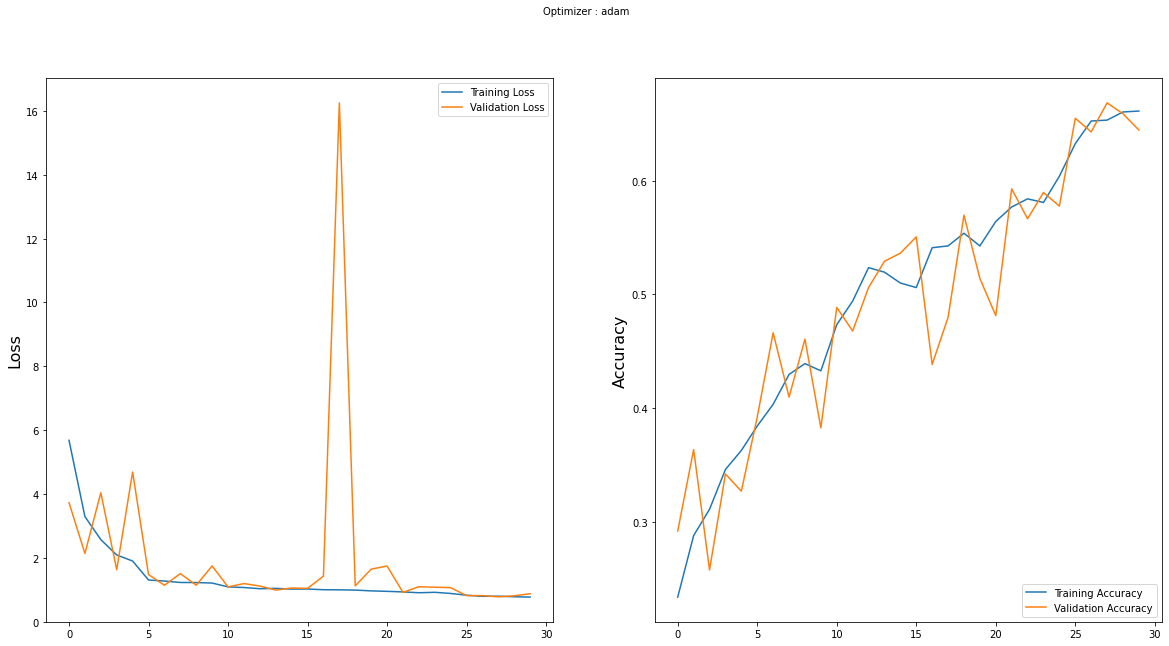

In [102]:
import matplotlib.pyplot as plt

x=hist10
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Xception

In [103]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

In [104]:
# Defining the pretrained base model
base = Xception(include_top=False, weights='imagenet', input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x)
# Defining the head of the model where the prediction is conducted
head = Dense(5, activation='softmax')(x)
# Combining base and head 
model11 = Model(inputs=base.input, outputs=head)

model11.compile(optimizer='sgd', 
              loss = 'categorical_crossentropy', 
              metrics=["accuracy"])

In [105]:
model11.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 63, 63, 32)   864         input_12[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 63, 63, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 63, 63, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [106]:
hist11 = model11.fit(train_set, validation_data=test_set, epochs=30, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/30
273/273 [==============================] - 10s 28ms/step - loss: 1.5305 - accuracy: 0.2587 - val_loss: 1.3897 - val_accuracy: 0.4294
Epoch 2/30
273/273 [==============================] - 7s 27ms/step - loss: 1.3371 - accuracy: 0.3835 - val_loss: 1.3326 - val_accuracy: 0.4202
Epoch 3/30
273/273 [==============================] - 7s 27ms/step - loss: 1.2302 - accuracy: 0.4183 - val_loss: 1.2591 - val_accuracy: 0.5303
Epoch 4/30
273/273 [==============================] - 7s 27ms/step - loss: 1.1462 - accuracy: 0.4569 - val_loss: 1.1448 - val_accuracy: 0.5670
Epoch 5/30
273/273 [==============================] - 7s 27ms/step - loss: 1.0824 - accuracy: 0.5046 - val_loss: 1.1063 - val_accuracy: 0.5963
Epoch 6/30
273/273 [==============================] - 7s 27ms/step - loss: 1.0447 - accuracy: 0.5101 - val_loss: 1.0492 - val_accuracy: 0.6239
Epoch 7/30
273/273 [==============================] - 7s 27ms/step - loss: 0.9715 - accuracy: 0.5541 - val_loss: 1.0409 - val_accuracy: 0.620

In [111]:
y_pred = model11.predict(test_set,verbose=1,steps=len(test_set))
y_pred = np.argmax(y_pred,axis=1)
cm1=confusion_matrix(test_set.classes,y_pred)
print(cm1)

273/273 [==============================] - 2s 6ms/step
[[27 17 27 17 21]
 [21 20 19 24 25]
 [18 30 16 26 19]
 [21 22 25 17 24]
 [22 20 22 24 21]]


In [112]:
fpr, fnr, thresholds = metrics.roc_curve(test_set.classes,y_pred, pos_label=2)

In [114]:
dl11_acc = hist11.history["val_accuracy"]
dl11_prec = precision_score(test_set.classes,y_pred,average='weighted')
dl11_rec = recall_score(test_set.classes,y_pred,average='weighted')
dl11_f1 = f1_score(test_set.classes,y_pred,average='weighted')
dl11_fpr = 2*Average(fpr)
dl11_fnr = 2*Average(fnr)
dl11_spec = specificity_score(test_set.classes,y_pred,average='weighted')
dl11_sens = sensitivity_score(test_set.classes,y_pred,average='weighted')
dl11_kap = cohen_kappa_score(test_set.classes,y_pred)
dl11_roc = metrics.auc(fpr, fnr)

In [142]:
storeResults('Xception',dl11_acc[29],dl11_prec,dl11_rec,dl11_f1,dl11_fpr,dl11_fnr,dl11_spec,dl11_sens,dl11_kap,dl11_roc)

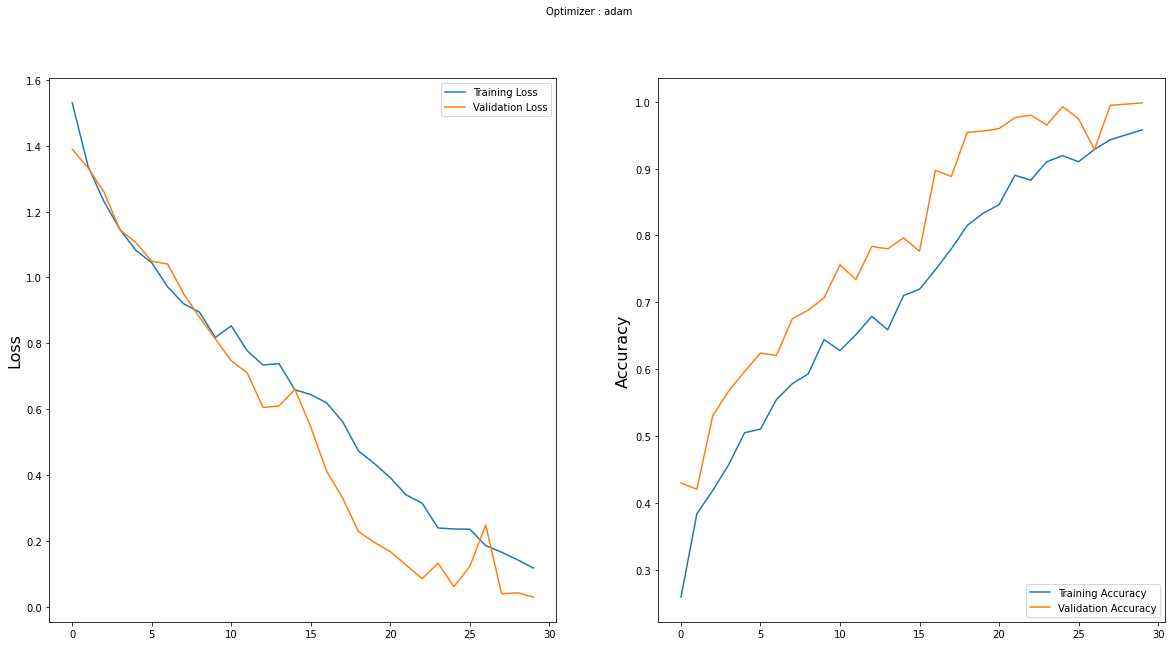

In [115]:
import matplotlib.pyplot as plt

x=hist11
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Comparison

In [143]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                       'FPR' : fpr,
                       'FNR' : fnr,
                       'Specificity' : spec,
                       'Senstivity' : sens,
                       'Kappa Score' : kapa,
                       'ROC' : roc
                        
                      })

In [144]:
result

,ML Model,Accuracy,Precision,Recall,F1_score,FPR,FNR,Specificity,Senstivity,Kappa Score,ROC
0,ResNet50,0.475,0.196,0.189,0.185,0.963,1.018,0.797,0.189,-0.014,0.532
1,ResNet152,0.354,0.215,0.182,0.116,1.027,1.040,0.795,0.182,-0.023,0.508
2,ResNet101,0.319,0.203,0.204,0.181,0.959,0.939,0.801,0.204,0.005,0.485
3,CNN,0.459,0.231,0.229,0.228,0.987,0.948,0.807,0.229,0.037,0.477
4,AlexNet,0.319,0.164,0.215,0.163,1.261,1.266,0.804,0.215,0.018,0.503
5,InceptionV3,0.136,0.163,0.191,0.149,0.785,0.767,0.798,0.191,-0.011,0.479
6,InceptionResNetV2,0.350,0.190,0.194,0.171,1.058,0.979,0.799,0.194,-0.007,0.459
7,Deep Residual Networks,0.492,0.202,0.204,0.201,1.058,0.979,0.801,0.204,0.005,0.494
8,DenseNet201,0.502,0.256,0.255,0.241,1.058,0.979,0.814,0.255,0.069,0.501
9,DenseNet121,0.645,0.224,0.224,0.213,1.058,0.979,0.806,0.224,0.030,0.478


# Model Dumping

In [145]:
model11.save('model_messidor.h5')

# Graph

In [146]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

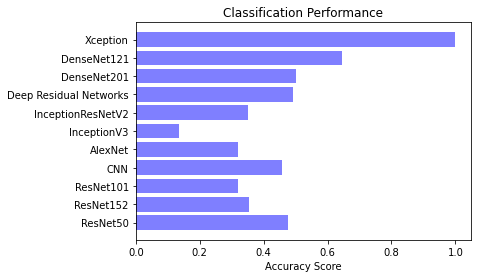

In [147]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

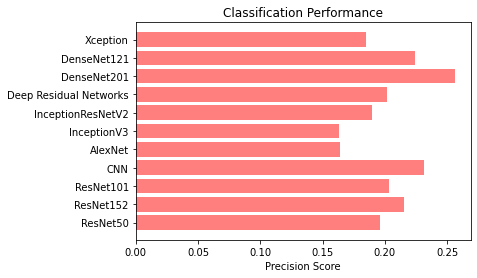

In [148]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

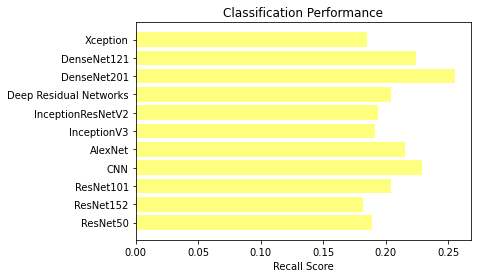

In [149]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

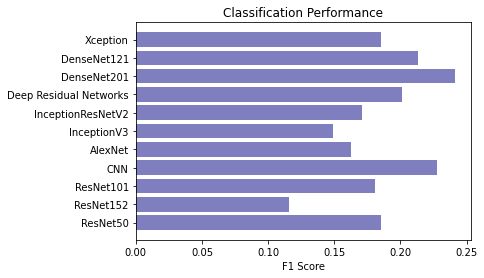

In [150]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# FPR

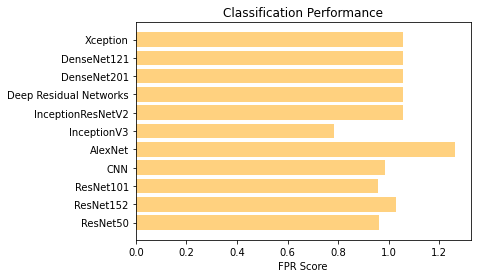

In [151]:
plt2.barh(y_pos, fpr, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('FPR Score')
plt2.title('Classification Performance')
plt2.show()

# FNR

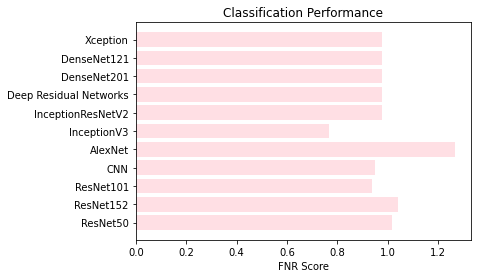

In [152]:
plt2.barh(y_pos, fnr, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('FNR Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

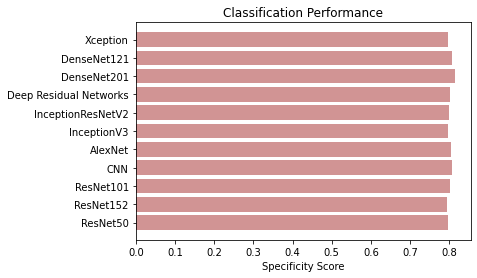

In [153]:
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity Score')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

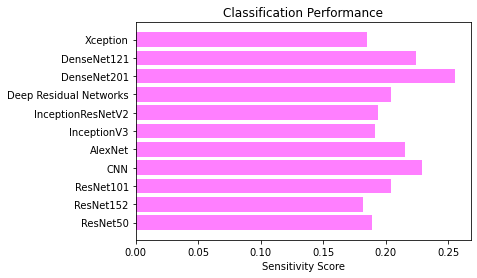

In [155]:
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity Score')
plt2.title('Classification Performance')
plt2.show()

# Kappa Score

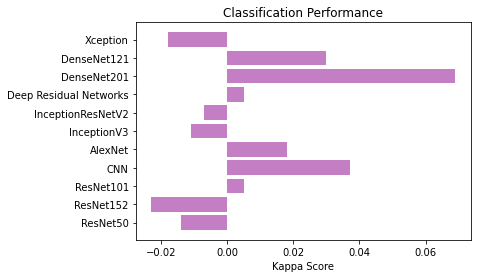

In [156]:
plt2.barh(y_pos, kapa, align='center', alpha=0.5,color='darkmagenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Kappa Score')
plt2.title('Classification Performance')
plt2.show()

# ROC

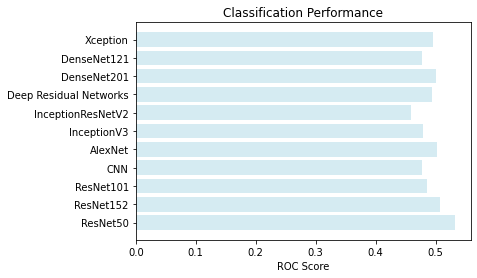

In [157]:
plt2.barh(y_pos, roc, align='center', alpha=0.5,color='lightblue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('ROC Score')
plt2.title('Classification Performance')
plt2.show()